## Major Risk factors for Cardiovascular Diseases

### Investigation Overview
This analysis explores risk factors for cardiovascular diseases. The dataset was gotten from [kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset) and consists of 70 000 records of patients data. _(All of the dataset values were collected at the moment of medical examination.)_ 
In this investigation,  I was interested in figuring out what features are best for predicting the chances of having cvd. The main focus was on the  blood pressures, age and effect with cvd and other categorical variables.

### Dataset Overview
The dataset consisted of 70,000 rows patients records, and 13 variables including age, weight, height, systolic bp ,diastolic bp and many others. I performed cleaning on the data while also discovering outliers and incorrect values in the dataset.

In [26]:
# Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [27]:
# read file into dataframe
df = pd.read_csv('cardio_train.csv', sep = ';')

In [28]:
# Make copy of data
cardio_df = df.copy()

In [29]:
# Rename columns to appropriate names
cardio_df.rename(columns = {'ap_hi':'systolic_bp', 'ap_lo':'diastolic_bp', 'gluc':'glucose', 'alco':'alcohol'}, 
                 inplace = True)

In [30]:
# Replace 'False numerical' values
cardio_df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
cardio_df['glucose'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
cardio_df['gender'].replace({1: 'female', 2: 'male'}, inplace = True)

columns = ['smoke', 'alcohol', 'active', 'cardio']
for col in columns:
    cardio_df[col].replace({0: 'no', 1: 'yes'}, inplace = True)

In [31]:
# Defining function to change age to years
def age_year(column):
    age = np.floor(column/365)    # divide by 365 and round down to next full integer
    age = age.astype('int')       # change to integer datatype
    return age

In [32]:
# Applying function to age column
cardio_df['age'] = cardio_df['age'].apply(age_year)

In [33]:
# data Wrangling
cardio_df['systolic_bp'] = cardio_df['systolic_bp'].astype('str')
negative = cardio_df[cardio_df['systolic_bp'].str.contains('-')] 
negative['systolic_bp'] = negative['systolic_bp'].str.strip('-')
cardio_df['systolic_bp'].update(negative['systolic_bp'])
cardio_df['systolic_bp'] = cardio_df['systolic_bp'].astype('int')

In [34]:
# data wrangling
cardio_df = cardio_df.drop(cardio_df[cardio_df.systolic_bp > 240].index)
cardio_df = cardio_df.drop(cardio_df[cardio_df.diastolic_bp > 140].index)

In [35]:
# order categorical variables
level = ['normal', 'above normal', 'well above normal']
order = pd.api.types.CategoricalDtype(ordered = True, categories = level)
cardio_df['glucose'] = cardio_df['glucose'].astype(order)
cardio_df['cholesterol'] = cardio_df['cholesterol'].astype(order)
cardio_df['cardio'] = cardio_df['cardio'].astype( pd.api.types.CategoricalDtype(ordered = True, categories = ['no', 'yes']))

In [36]:
# Setting color palette
red_blue = sns.color_palette('RdYlBu')
blue = red_blue[5]
red = red_blue[0]
light_blue = red_blue[4]

In [37]:
# creating a countplot function
def countplot(x, data = cardio_df, figsize = (10,5), xlabel = None, ylabel = None, color=None, palette=None, 
              hue=None, title = None, label = True):
    ''' This function returns a countplot 
    '''
    
    # set figure size
    plt.figure(figsize=figsize)
    
    # Plot graph
    if label == True:
        ax = sns.countplot(x=x, data = data, color = color, palette= palette, hue = hue)
        ax.bar_label(ax.containers[0])
    else: 
        ax = sns.countplot(x=x, data = data, color = color, palette= palette, hue = hue)
    
    # Plot graph labels
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize = 11)
    plt.ylabel(ylabel, fontsize =11)

In [38]:
# creating a histplot function 
def histplot(x, data = cardio_df, figsize=(10,5), xlabel=None, ylabel=None, color=None, palette=None, 
             hue=None, bins= 10,title = None):
    ''' This function returns a histplot 
    '''
    
    # set figure size
    plt.figure(figsize=figsize)
    
    # Plot graph
    sns.histplot(x=x, data = data, color = blue, palette= palette, hue = hue, bins = bins)
    
    # Plot graph labels
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize = 11)
    plt.ylabel('Frequency', fontsize =11)
    plt.gca().spines[['top', 'right']].set_visible(False)

### What percentage of the data has cvd?
There is an approximate 50/50 share of patients that have cvd and those that don't.

In [39]:
yes = str(round((sum(cardio_df.cardio=='yes')/len(cardio_df.cardio)) * 100, 2 )) + '%'
no = str(round((sum(cardio_df.cardio=='no')/len(cardio_df.cardio)) * 100, 2 )) + '%'

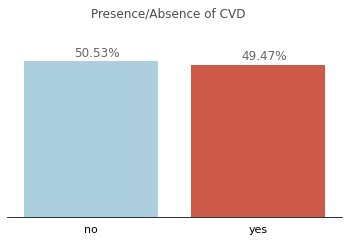

In [40]:
countplot(x='cardio', figsize=(6,3), palette = [light_blue, red], label = False)
plt.gca().spines[['top','left','right']].set_visible(False) 
plt.gca().set_yticklabels([])
plt.gca().tick_params(left = False, bottom=False)
plt.gca().text(0, 45000, 'Presence/Absence of CVD', fontsize=12, alpha = 0.7)
plt.gca().text(-0.1, 36000, no, fontsize=12, alpha = 0.6)
plt.gca().text(0.9, 35500, yes, fontsize=12, alpha = 0.6) 
plt.xticks(fontsize=11);

### Age distribution
The distribution is bimodal with common frequency at 53 & 55 and with the majority of data are aged 49- 60. There also appear to be less data 39 years of age below. This data captures adults.

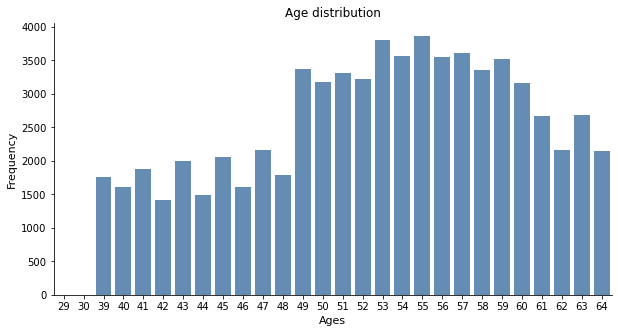

In [41]:
countplot(x='age', xlabel='Ages', ylabel='Frequency',color=blue, title='Age distribution', label = False)
plt.gca().spines[['top', 'right']].set_visible(False)

### Systolic and diastolic blood pressure distribution
Both distributions are similar, the diastolic distribution looks slightly different(bins are larger which makes sense since it takes a smaller range of values). It's likely that these variables will be correlated with one another. Common values are at intervals 120 and 80(about 75% of the data are above these values) respectively which are the values for the optimal blood pressure. A normal blood pressure are below these values. It would also be good to see the relationship of values above 120 and 80 with cvd since the normal blood pressure should be below this values

In [42]:
# remove incorrect values
low_systolic = cardio_df.loc[(cardio_df['systolic_bp'] < 50),:]
low_diastolic = cardio_df.loc[(cardio_df['diastolic_bp'] < 40),:]
cardio_df = cardio_df.drop(low_systolic.index | low_diastolic.index)

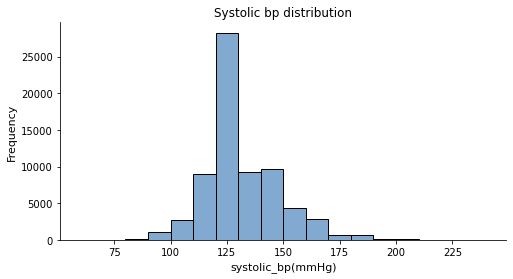

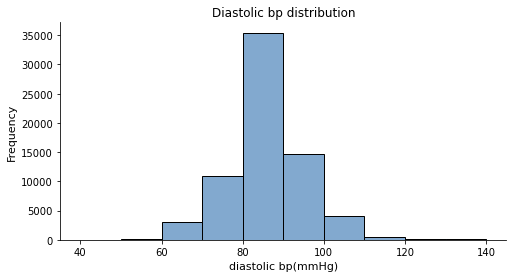

In [43]:
fig, (ax1, ax2) = plt.subplots(2)

bins1 = np.arange(min(cardio_df['systolic_bp']), max(cardio_df['systolic_bp']) + 10, 10)
ax1 = histplot(x='systolic_bp', xlabel= 'systolic_bp(mmHg)', title='Systolic bp distribution', figsize = (8,4), bins = bins1)

bins2 = np.arange(min(cardio_df['diastolic_bp']), max(cardio_df['diastolic_bp'])+ 10, 10)
ax2 = histplot(x='diastolic_bp',xlabel= 'diastolic bp(mmHg)', title='Diastolic bp distribution', figsize = (8,4), bins = bins2)
plt.close(fig);

In [44]:
# remove incorrect values -- from height and weight
low_height = cardio_df.loc[cardio_df['height'] < 100]
cardio_df = cardio_df.drop(low_height.index)

# resetting index numbers
cardio_df = cardio_df.reset_index(drop= True)

### Do aging increase the chances of having cvd?
Lower ages have less cvd occurences as compared to the older groups

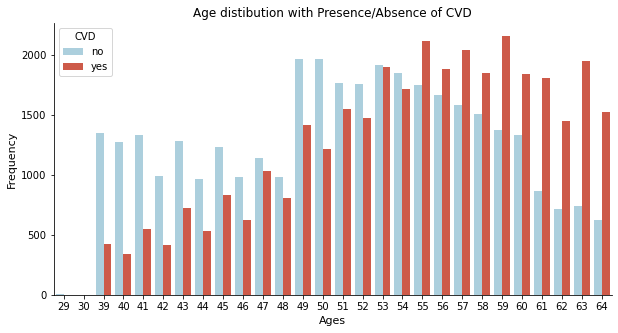

In [45]:
countplot(x='age', xlabel='Ages', ylabel='Frequency',palette=[light_blue, red],hue='cardio', 
          title='Age distibution with Presence/Absence of CVD', label = False)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend(loc='upper left', title= 'CVD');

### Blood Pressures and cvd
This gives more insight into the distribution of the values by presence/absence of cvd. Remember that 75% of the data are above 120 & 80mmHg, we can see from this chart that a large percent -- about 75%) of that group have cvd.

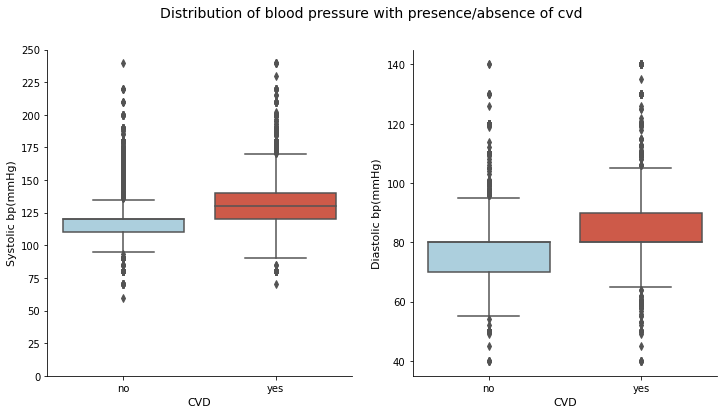

In [46]:
plt.figure(figsize=(12,6))
plt.suptitle('Distribution of blood pressure with presence/absence of cvd', fontsize =14)

plt.subplot(1,2,1)
sns.boxplot(data=cardio_df, y="systolic_bp", x="cardio",  palette = [light_blue, red])
plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('CVD', fontsize =11)
plt.ylabel('Systolic bp(mmHg)', fontsize = 11)

plt.subplot(1,2,2)
sns.boxplot(data=cardio_df, y="diastolic_bp", x="cardio",  palette = [light_blue,red])
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('CVD', fontsize =11)
plt.ylabel('Diastolic bp(mmHg)', fontsize = 11);

**Featuring a new variable - BMI** <br>
Body mass index (BMI) is a measure of body fat based on height and weight. It is calculated as  $ {bmi} = \frac{weight(kg)}{height(m^2)} $

In [47]:
cardio_df['bmi'] = round(cardio_df.weight/((cardio_df.height/100)** 2), 1)

The BMI will be a useful feature to use with cholesterol level.

### PairGrid of numeric features against categorical features
There seem to be an effect of the categorical variables on the distribution of the numeric features(especially on systolic and age). Also, there isn't much difference as to whether a patient is active or not across all numeric variables.

<Figure size 720x720 with 0 Axes>

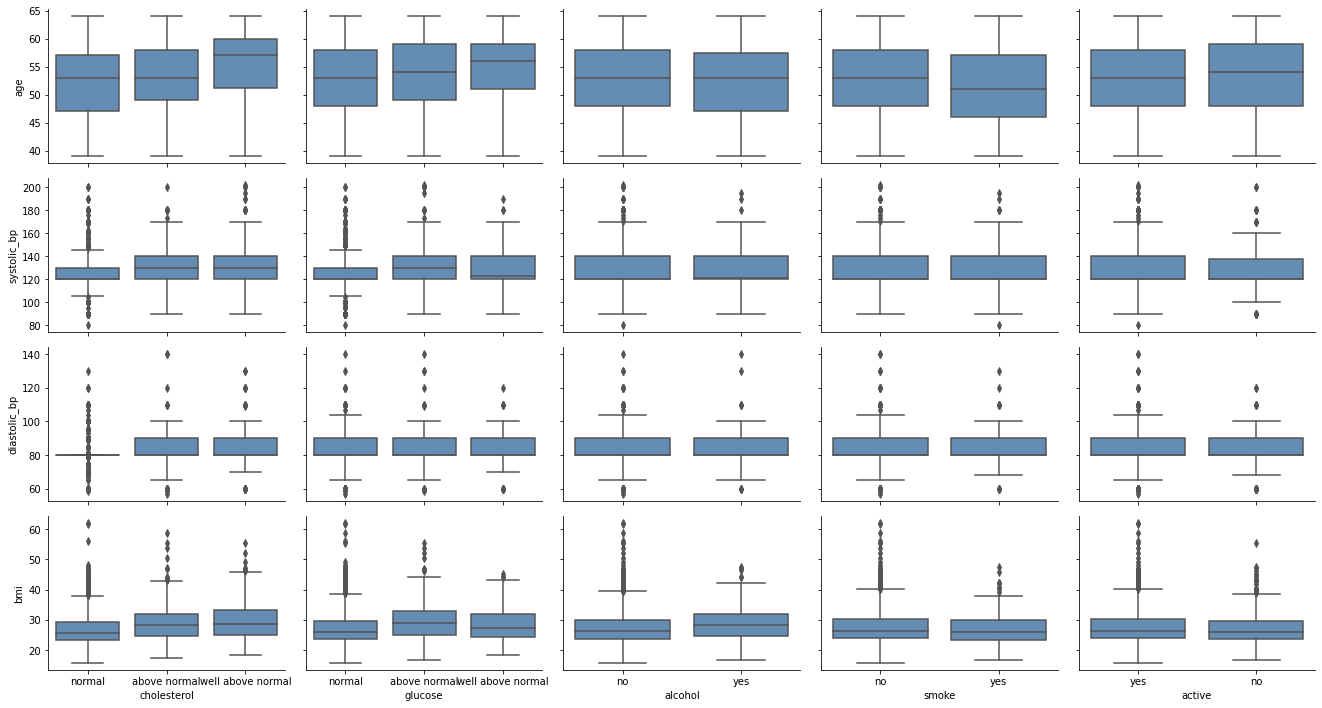

In [48]:
y_vars = ['age','systolic_bp', 'diastolic_bp', 'bmi']
x_vars = ['cholesterol', 'glucose','alcohol', 'smoke', 'active']
# plot matrix of numeric features against categorical features.(sampling to reduce overplotting and run faster)
samples_a = np.random.choice(cardio_df.shape[0], 3000, replace = False)
cardio_df_samp_a = cardio_df.loc[samples_a,:]

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = cardio_df_samp_a, y_vars = y_vars, x_vars = x_vars, aspect = 1.5)
g.map(sns.boxplot, color = blue)
plt.show();

### Pairgrid of numeric and categorical features with cvd
From this plot, we can see that even patients with normal glucose or cholesterol level or not smoking etc have cvd.
Another thing we can note here is, for every pair(cvd or no cvd), the distribution of those that had cvd is higher compared to those that dont have. I also expected bmi to have some relationship with cholesterol level. It is reasonable to say the numeric features here drive the chances of cvd more than the categorical features.

<Figure size 720x720 with 0 Axes>

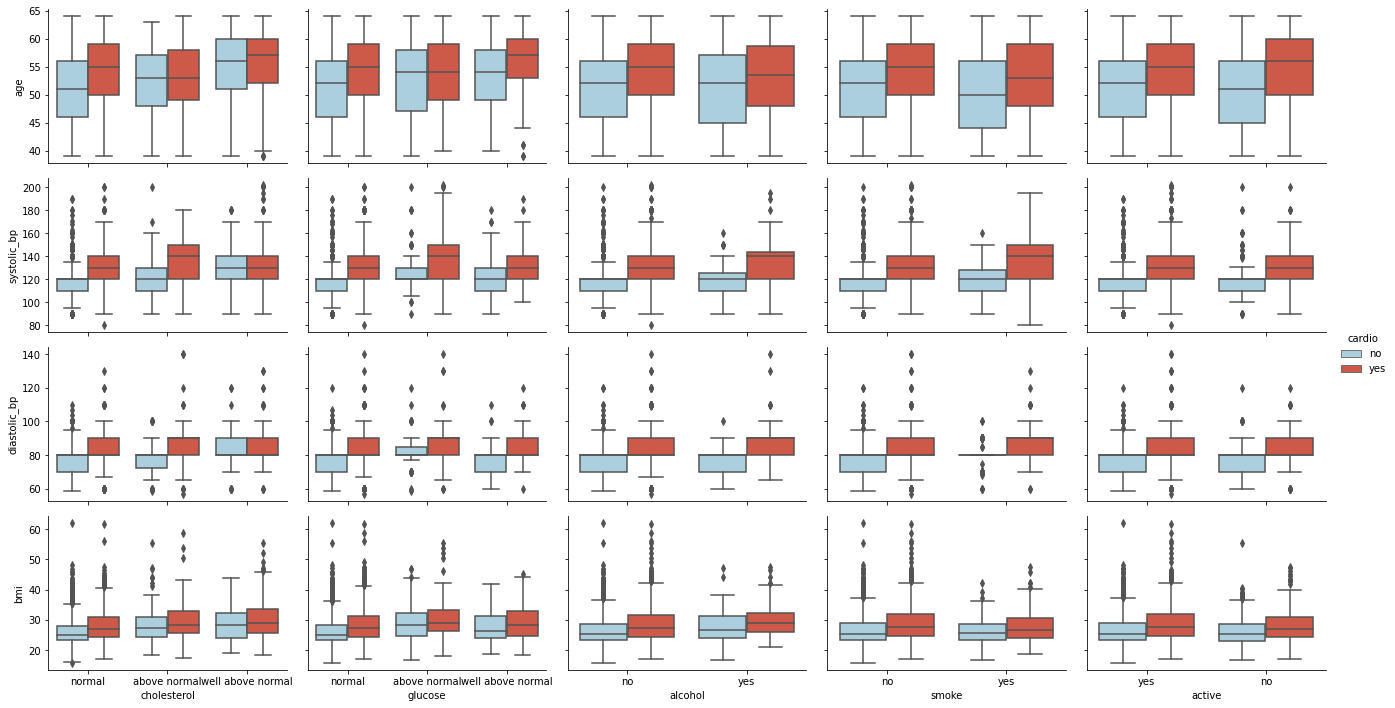

In [49]:
#Using the sampled dataframe above
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = cardio_df_samp_a, y_vars = y_vars, x_vars = x_vars, aspect = 1.5, 
                 hue='cardio', palette=[light_blue, red])
g.map(sns.boxplot)
g.add_legend()
plt.show();

### Blood pressures and cvd
For those without cvd, values are more concentrated below 80 diastolic and 135 systolic. For the cases where cvd is present, values are concentratd below 100 and around 160 systolic.However,the presence of high blood pressure doesn't necessarily indicate presence of cvd, other risk factors are involved.

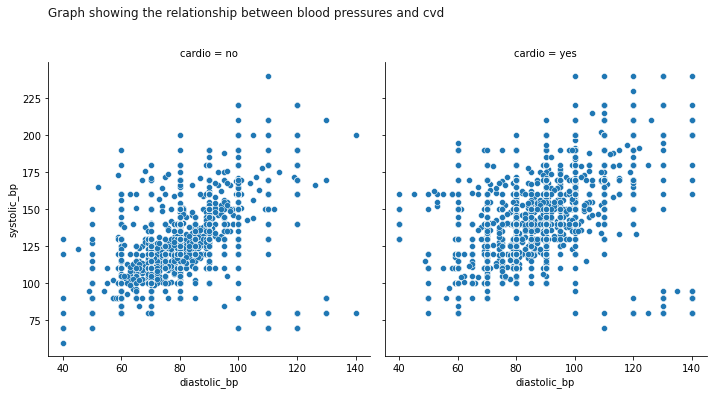

In [50]:
sns.relplot(y='systolic_bp', x='diastolic_bp', data = cardio_df, col='cardio')
plt.gca().text(-80, 280, 'Graph showing the relationship between blood pressures and cvd',
               fontsize=12, alpha = 0.9);

In [51]:
!jupyter nbconvert Slide_deck_Cvd_Eda.ipynb --to slides --post serve --no-input --no-prompt

^C
